# The Curse of Dimensionality

## Example 1: $P(x)$ of $x$ being at the border of a unit square

Pick a random point in a unit square (1 x 1). It will have 0.4% chance of being located less than 0.001 from the border.

Let's make a simulation of this scenario:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [4]:
def vis_square(border):
    """
    Visualize a square with a border and a random point
    """
    
    def draw_squares(border):
        # draws the two squares
        sqr = mpl.patches.Rectangle((0,0),1,1)
        ax.add_patch(sqr)
        sqr_2 = mpl.patches.Rectangle((0+border,0+border),1-border*2,1-border*2, color='w')
        ax.add_patch(sqr_2)

    # random point (x, y):
    x, y = np.random.rand(2)

    fig, ax = plt.subplots(figsize=(7,7))
    draw_squares(border)
    ax.plot([x],[y], c='r',marker='x', markersize=12)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.show()

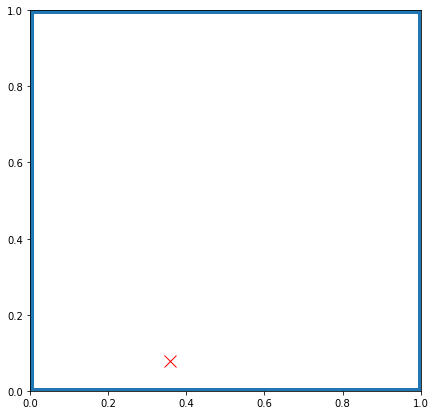

In [5]:
vis_square(0.01)  # border = 0.001 is not visible 

The probability of the random point $x$ to land in the blue zone is:

### with Monte Carlo simulation (naive approach):

In [6]:
def simulate(n, matrix):
    count = 0
    border_points = 0

    while count < n:    
        sample = np.random.choice(matrix.flat)
        if sample == 0:
            border_points +=1
        count += 1

    print(f'probabilty of point in border: {border_points/count}')

In [7]:
mat = np.zeros((1000,1000), dtype=np.bool)
mat[1:-1,1:-1] = 1  # left border with 0 

In [8]:
simulate(10000, mat)

probabilty of point in border: 0.0047


the problem of this approach is that with 4 dimension ($1000^4$) we run out of memory.

Each element of `np.bool` is a byte. So we need 1000^4 bytes which is **931.32257 Gb** ...a bit too much.


### With math:

Let's start with 1-D example:

We have a segment of length 1. And we crop two small segments of 0.001 at both ends of the the segment. We will call $B$ the small segments ($B = 0.002$) and the long segment $A$:

$$ A_1 + B_1 = 1 $$

then, 

$$ A_1 = 1 - B_1 $$

$$ A_1 = 0.998 $$

The probability of picking a random point that lays in the borders is:

$$P(x \in B) = 1 - 0.998 = 0.002 $$
$$P(x \in B) = B$$

Which is the length of the borders.

For the 2-D example simply square the inner segment $A^2 = 0.996$ and do difference with $1$ to get the area of the border:

$$ B_2 = 1 - 0.998^2 = 0.004 $$

Generalizing for arbitrary number of dimensions $d$:

$$ B_d = 1 - 0.998^d $$

In [9]:
# implement the equaiton
def border_prob(d):
    prob = 1 - (0.998)**d
    return prob

In [140]:
border_prob(10000)

0.999999997979714

Most points in a high-dimensional hypercube are very close to the border!. 
> Anyone you know is probably an extremist in at least one dimension (e.g., how much sugar they put in their coffee), if you considere enough dimensions

Aurélien Geron in Hands on Machine Learning with Scikit-Learn & TensorFlow

## Distance example

A more troublesome effect of high dimensional spaces: pick two random points in a unit square, the mean distance between these two points will be 0.52. In a unit 3D cube, the average distance will be 0.66. Let's see what happens in higher dimensions:

In [10]:
def mean_dist(d, n, p=2):
    """
    mean distance between pairs of random points in d dimensional space
    
    Parameters
    ----------
    
    d: int, number of dimensions
    
    n: int, number of pair of points (high == precision)
    
    p: int, subindex for the L_p norm or distance.
        L_2 (p=2) is euclidian distance, L_1 (p=1) is manhattan,
    
    Returns
    -------
    tuple(float, float)
      mean distance of the n pair of points.
      difference max dist and min dist
    """
    distances = []
    for _ in range(n):
        a = np.random.rand(int(d))
        b = np.random.rand(int(d))
        distances.append(np.linalg.norm(a-b, p))
    return np.mean(distances), max(distances) - min(distances)

In [11]:
mean_dist(3,10000)

(0.6615512543615835, 1.5729782542933433)

let's check the mean distance for a 1,000,000 dimensional unit hypercube

In [26]:
mean_dist(1e7, 100)

(1291.0005227903168, 1.1512413519869824)

Points in this high dimensional dataset are likely to be far apart. This means that high dimensional datasets are at risk of being very sparse. 

How can we solve this problem?

+ Gather more data:

+ Reduce dimensions: projection or manifold learning